In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from numpy.random import seed
seed(1)

In [ ]:
#To upload CSV file from device
from google.colab import files
data_to_load = files.upload()


Saving fp.csv to fp.csv


In [ ]:
# load dataset
dataset = pd.read_csv('fp.csv')
df1 = pd.read_csv('FinalProject',index_col='month')

In [ ]:
dataset = dataset.drop(['year','month'],axis=1)

In [ ]:
dataset.head()

,energy_used,mean_temp,max_temp,min_temp,vapor_pressure,rain_days,cloud_cover,population,electricity_price,cpi
0,1957.641,17.0,0.9,-10.1,4.0,14.3,66.2,211053,2.9,36.5
1,1712.143,20.0,4.0,-7.8,4.4,15.8,64.5,211187,2.9,36.7
2,1510.079,23.2,9.0,-2.3,6.4,16.1,68.5,211337,2.8,36.9
3,1183.421,28.5,13.1,0.8,7.1,11.2,65.1,211499,2.9,37.1
4,1006.326,30.0,19.8,6.3,9.5,8.1,60.9,211662,2.8,37.1


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy_used,504.0,1523.147333,403.323957,901.7,1201.47475,1452.729,1779.560,2808.419
mean_temp,504.0,23.980357,4.109993,15.8,20.00000,25.350,27.100,30.200
max_temp,504.0,15.232143,9.087314,-1.4,6.82500,15.600,24.050,29.200
min_temp,504.0,2.688889,8.323195,-12.0,-4.75000,2.500,10.900,15.700
vapor_pressure,504.0,9.361706,4.465599,3.1,5.30000,8.100,13.525,18.100
rain_days,504.0,9.047619,4.485913,3.6,5.20000,7.450,13.425,19.300
cloud_cover,504.0,60.291071,4.597084,49.5,56.00000,60.950,63.800,70.600
population,504.0,263593.811508,33055.393609,211053.0,234356.25000,261908.500,293164.750,319742.000
electricity_price,504.0,7.941766,2.527638,2.6,6.78750,8.040,9.055,13.090
cpi,504.0,123.938438,45.605206,36.5,99.57500,124.050,146.525,217.930


In [ ]:
X = dataset.iloc[:, 1:11].values
y = dataset.iloc[:, 0].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.231, shuffle = False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly', degree =6)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=6, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,index=df1.index[387:])

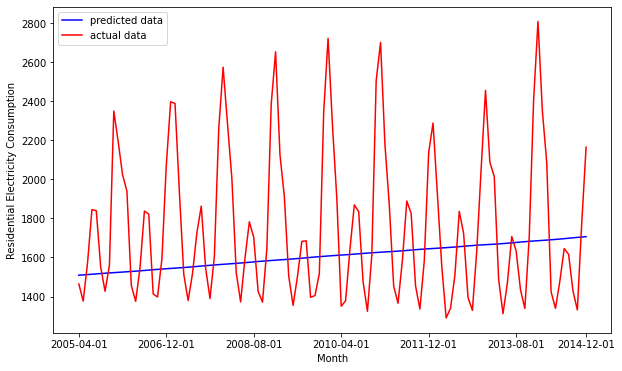

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_pred[:], label = "predicted data",c = "b")
plt.plot(y_test[:],label = "actual data",c="r")
plt.xlabel("Month")
plt.xticks([0,20,40,60,80,100,116])
plt.ylabel("Residential Electricity Consumption")
plt.legend()

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
test_results = {}
test_results['mse'] = mean_squared_error(y_test, y_pred)
mse = test_results['mse']
test_results['rmse'] = np.sqrt(mse)
test_results['mae'] = mean_absolute_error(y_test,y_pred)
test_results['mape'] = mape(y_test,y_pred)
test_results

{'mae': 307.3733061634193,
 'mape': 15.95155147468137,
 'mse': 169514.1358044608,
 'rmse': 411.72094409255016}

In [ ]:
Results = pd.DataFrame.from_dict(test_results, orient='index', columns=['Error'])
Results.T

,mse,rmse,mae,mape
Error,169514.135804,411.720944,307.373306,15.951551
